# Libraries

In [1]:
from pathlib import Path
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import shutil
import pandas as pd
from tqdm import tqdm
import time

notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'current directory is: {notebooks_path}')

import utils_ric as utils
from info import patient

current directory is: /home/ricardino/Documents/MAIA/tercer_semestre/MIRA/final_project/MIRA_FINAL_PROJECT/notebooks


# Main

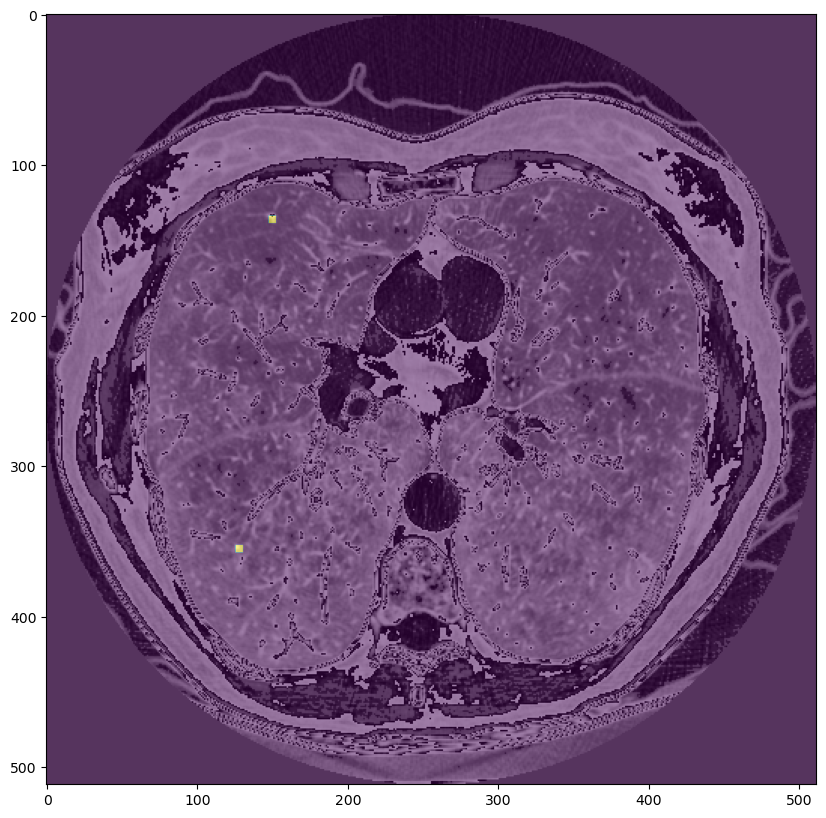

In [101]:
import cv2 as cv
#Show images with points
pat = patient(num=1)
im = pat.im_array(type='i')
landmarks = pat.get_landmark(type='i', units='voxel').astype(int)
landmarks_mask = np.zeros_like(im, dtype=np.uint8)
landmarks_mask[landmarks[:,2], landmarks[:,1], landmarks[:,0]] = 1
#now we will dilate each slide using cv2.dilate
for i in range(landmarks_mask.shape[0]):
    landmarks_mask[i] = cv.dilate(landmarks_mask[i], np.ones((5,5), np.uint8), iterations=1)
#histogram equalization

    

slide = 61
plt.figure(figsize=(10,10))
plt.imshow(landmarks_mask[slide], alpha=1)
plt.imshow(cv.equalizeHist(im[slide].astype(np.uint8)), alpha=0.5, cmap='gray')